In [97]:
import pandas as pd

# Load stock price data
price_data = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0, parse_dates=True)


In [98]:
price_data.shape

(1043, 471)

In [99]:
import numpy as np

# Calculate log returns
log_returns = np.log(price_data.shift(1) / price_data).dropna()


In [100]:
log_returns

,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2011-01-04,0.001384,0.000643,-0.009366,0.031688,-0.007006,-0.034806,-0.004773,-0.005141,0.018417,0.009356,...,0.006214,-0.030719,-0.004235,0.026830,-0.004071,0.004976,0.009598,0.015396,0.013369,0.016423
2011-01-05,0.000000,0.003382,0.000000,0.015596,-0.022282,-0.015837,-0.013402,-0.009569,0.001949,0.002172,...,0.003286,-0.012819,0.005935,-0.005249,-0.003380,-0.005427,-0.019105,-0.004747,-0.000737,-0.005638
2011-01-06,0.006134,0.004365,0.002074,0.033434,-0.001551,0.025001,-0.017081,-0.018557,0.005514,-0.001931,...,0.014589,-0.007264,0.000851,0.000000,-0.016728,0.000451,-0.008831,-0.006976,0.031440,0.002815
2011-01-07,-0.001044,0.007481,-0.004143,-0.000747,0.007153,-0.015982,0.000000,-0.002179,0.003931,-0.003369,...,0.003681,-0.034794,-0.008896,0.014060,0.005656,0.001807,0.009423,-0.012395,0.000190,0.010526
2011-01-10,-0.010613,0.013145,0.008930,-0.012429,-0.028310,-0.039961,0.001541,-0.001864,0.012975,-0.014313,...,0.008754,0.000253,0.006347,-0.009687,-0.007976,-0.000904,0.017911,-0.001413,-0.007766,0.018070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-12-26,0.004201,-0.001550,-0.003277,-0.005686,0.000937,0.000000,-0.029256,-0.002787,0.000000,-0.006060,...,-0.007442,0.003518,-0.009614,-0.004252,0.003863,0.000584,-0.004138,-0.004797,-0.000526,-0.001402
2014-12-29,-0.002703,-0.002235,0.005467,-0.016518,0.007258,-0.003766,-0.010493,0.001002,-0.000968,0.001209,...,-0.005200,-0.017339,-0.018150,0.000000,0.002964,-0.007565,0.006510,-0.005726,0.005886,-0.005587


In [101]:
from sklearn.preprocessing import StandardScaler

# Standardize log returns
scaler = StandardScaler()
log_returns_standardized = scaler.fit_transform(log_returns)


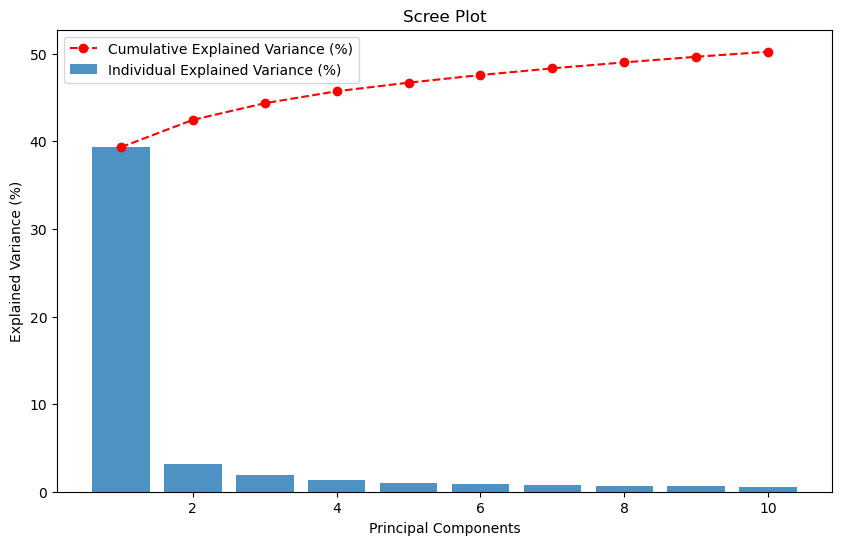

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Specify the number of components (e.g., 10)
n_components = 10

# Fit PCA model
pca = PCA(n_components=n_components)
log_returns_pca = pca.fit_transform(log_returns_standardized)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the scree plot with variance percentages
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, alpha=0.8, align='center', label='Individual Explained Variance (%)')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance * 100, marker='o', linestyle='--', color='red', label='Cumulative Explained Variance (%)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot')
plt.legend()
plt.show()


In [107]:
from sklearn.decomposition import PCA

# Specify the number of components (e.g., 10)
n_components = 471

# Fit PCA model
pca = PCA(n_components=n_components)
log_returns_pca = pca.fit_transform(log_returns_standardized)

# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Calculate the proportion of variance explained
explained_variance_ratio = pca.explained_variance_ratio_

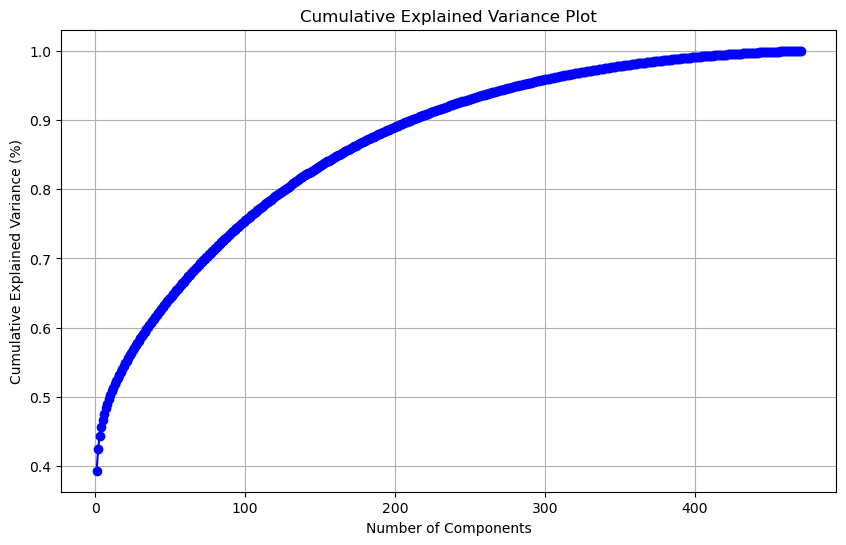

In [108]:
import matplotlib.pyplot as plt

# Get the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


In [109]:
# Set the desired threshold for cumulative explained variance
threshold_variance = 0.8

# Find the number of components needed to reach or exceed the threshold
num_components_needed = np.argmax(cumulative_explained_variance >= threshold_variance) + 1

# Print the result
print(f"Number of components needed to capture at least {threshold_variance * 100}% of total variance: {num_components_needed}")


Number of components needed to capture at least 80.0% of total variance: 127


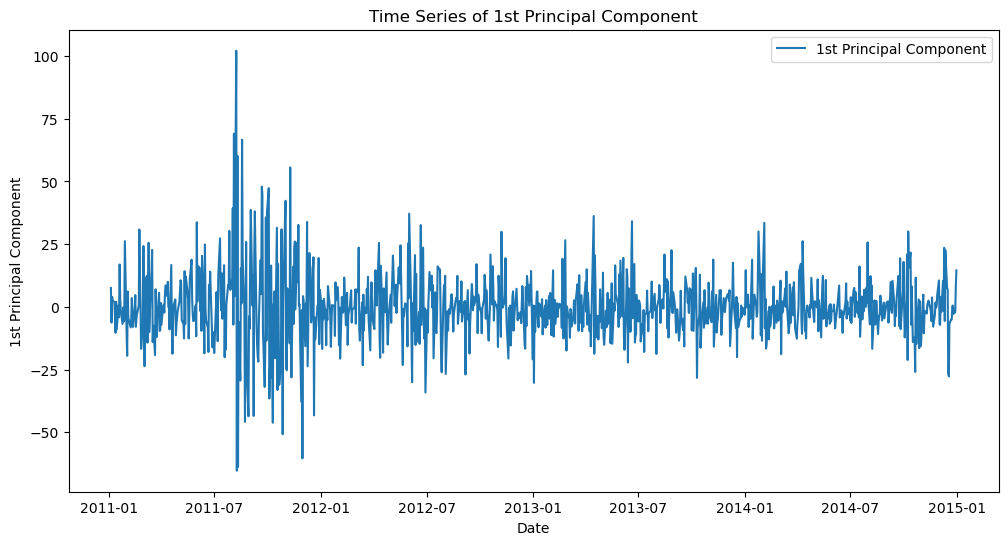

Date with the lowest value for the 1st principal component: 2011-08-09 00:00:00


In [110]:
# Get the 1st principal component time series
first_principal_component = log_returns_pca[:, 0]

# Plot the time series of the 1st principal component
plt.figure(figsize=(12, 6))
plt.plot(log_returns.index, first_principal_component, label='1st Principal Component')
plt.xlabel('Date')
plt.ylabel('1st Principal Component')
plt.title('Time Series of 1st Principal Component')
plt.legend()
plt.show()

# Identify the date with the lowest value for the 1st principal component
min_value_date = log_returns.index[np.argmin(first_principal_component)]
print(f"Date with the lowest value for the 1st principal component: {min_value_date}")


In [50]:


# Extract weights for the 1st and 2nd principal components
weights_1st_component = pca.components_[0, :]
weights_2nd_component = pca.components_[1, :]

# Display the weights
print("Weights for the 1st principal component:")
print(weights_1st_component)

print("\nWeights for the 2nd principal component:")
print(weights_2nd_component)


Weights for the 1st principal component:
[ 0.06148286  0.05612293  0.01338367  0.03142776  0.04873121  0.03739019
  0.05189389  0.04368021  0.05903906  0.05146821  0.05518395  0.05411716
  0.04362366  0.0379498   0.05502761  0.05357572  0.04042444  0.05536893
  0.04513837  0.03938982  0.03666691  0.04441632  0.04092533  0.05768976
  0.05357866  0.04201156  0.06338442  0.04514652  0.03825544  0.03280334
  0.0522285   0.05389427  0.05285698  0.05189078  0.05046586  0.02746048
  0.00855835  0.05017396  0.05091829  0.05338743  0.04309722  0.04969014
  0.0555124   0.04393453  0.03207285  0.04537758  0.05116935  0.03199813
  0.04889843  0.0251804   0.05309729  0.05897595  0.04608874  0.04877988
  0.05732623  0.04962918  0.03849037  0.05048002  0.06121387  0.02521246
  0.02667146  0.0364229   0.06182838  0.04243292  0.0026297   0.05293305
  0.05372974  0.04229311  0.03708482  0.04393482  0.03557961  0.04287546
  0.05175368  0.03206475  0.02687835  0.05160657  0.03594994  0.0544989
  0.0475701

In [51]:
len(weights_1st_component)

471

In [52]:


# Load SP500_ticker data into a DataFrame
SP500_ticker = pd.read_csv('SP500_ticker.csv')

# Display the DataFrame
print(SP500_ticker.head())


  ticker                   company_name                  sector
0    MMM                         3M Co.             Industrials
1    ACE                    ACE Limited              Financials
2    ABT            Abbott Laboratories             Health Care
3    ANF  Abercrombie & Fitch Company A  Consumer Discretionary
4   ADBE              Adobe Systems Inc  Information Technology


In [54]:
SP500_ticker.shape


(500, 3)

In [59]:
column_names = log_returns.columns

column_names

Index(['MMM', 'ACE', 'ABT', 'ANF', 'ADBE', 'AMD', 'AES', 'AET', 'AFL', 'A',
       ...
       'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'YHOO', 'YUM', 'ZMH',
       'ZION'],
      dtype='object', length=471)

In [68]:
data = {'ticker':column_names, 'weights1':weights_1st_component, 'weights2': weights_2nd_component}

pca_weights_industry = pd.DataFrame(data)

In [69]:
pca_weights_industry.head()

,ticker,weights1,weights2
0,MMM,0.061483,0.004348
1,ACE,0.056123,-0.037012
2,ABT,0.013384,-0.016967
3,ANF,0.031428,0.038111
4,ADBE,0.048731,0.022370


In [70]:
merged_df = pd.merge(pca_weights_industry, SP500_ticker[['ticker','sector']], on='ticker', how='left')

merged_df.head()

,ticker,weights1,weights2,sector
0,MMM,0.061483,0.004348,Industrials
1,ACE,0.056123,-0.037012,Financials
2,ABT,0.013384,-0.016967,Health Care
3,ANF,0.031428,0.038111,Consumer Discretionary
4,ADBE,0.048731,0.022370,Information Technology


In [71]:
merged_df.shape

(471, 4)

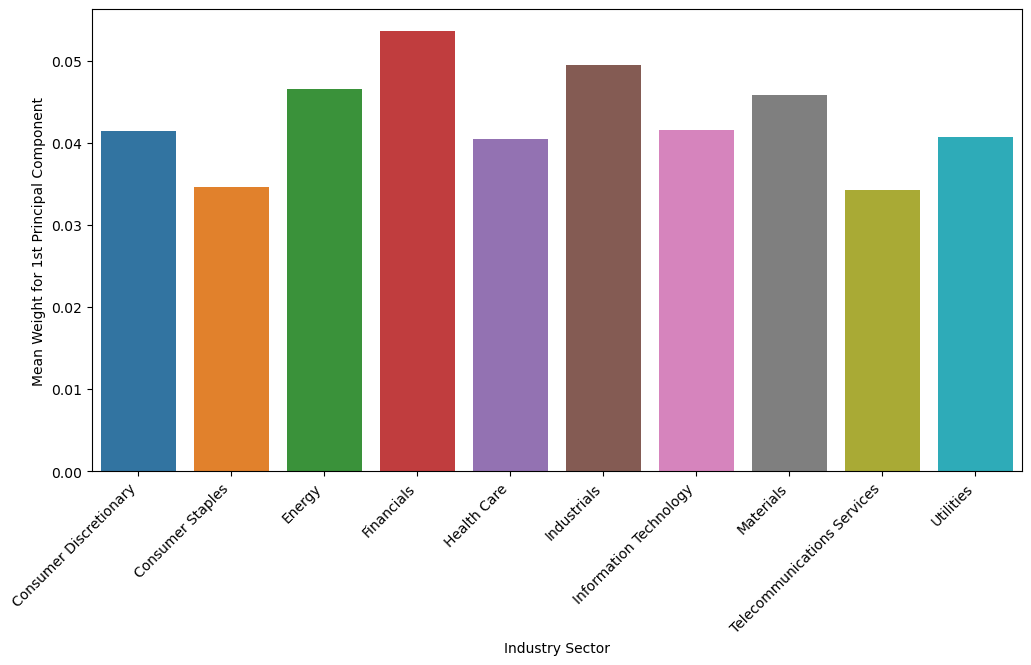

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' DataFrame with columns 'ticker', 'weights', and 'sector' is available

# Group by sector and calculate the mean weight for the 1st principal component
mean_weights_by_sector = merged_df.groupby('sector')['weights1'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='sector', y='weights1', data=mean_weights_by_sector)
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight for 1st Principal Component')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


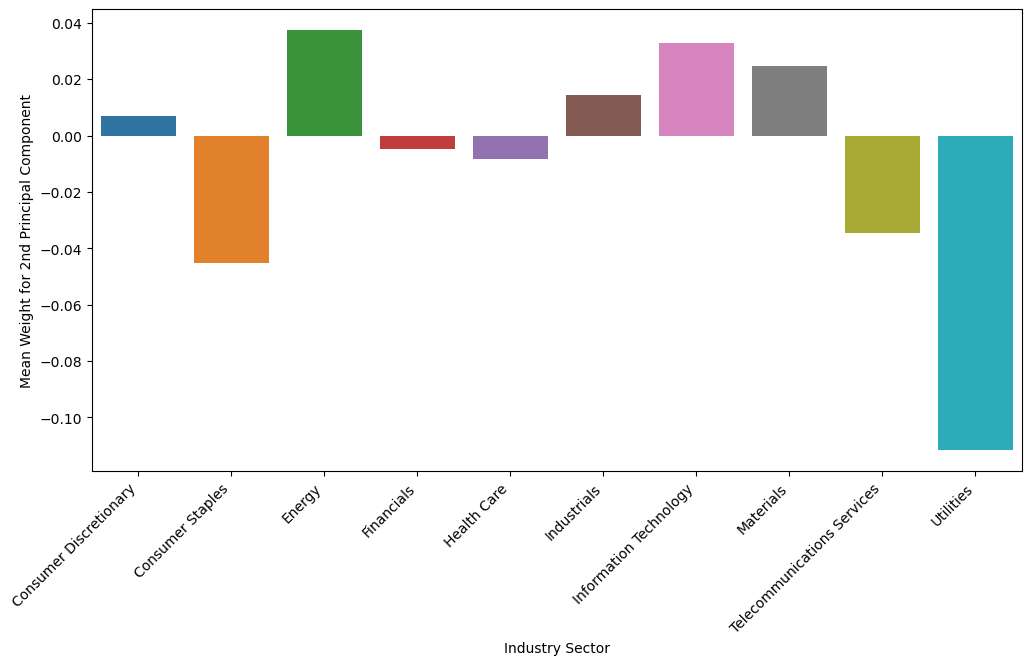

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' DataFrame with columns 'ticker', 'weights', and 'sector' is available

# Group by sector and calculate the mean weight for the 1st principal component
mean_weights_by_sector = merged_df.groupby('sector')['weights2'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='sector', y='weights2', data=mean_weights_by_sector)
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight for 2nd Principal Component')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [83]:
BMI = pd.read_csv('BMI.csv')

BMI.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,fatpctg
0,22,160.8,62.4,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
1,22,170.6,80.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,23,153.9,69.3,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
3,23,157.1,70.4,35.5,92.1,77.1,93.9,56.1,36.1,22.7,30.5,27.2,18.2,9.4
4,23,196.5,88.6,38.0,96.6,85.3,102.5,59.1,37.6,23.2,31.8,29.7,18.3,10.3


In [94]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming BMI is your DataFrame
# Replace 'fatpctg' with the actual target variable if it's different
target_variable = 'fatpctg'

# Split the data into features and target variable
X = BMI.drop(columns=target_variable)
y = BMI[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Backward stepwise regression
selected_features_backward = list(X.columns)

while len(selected_features_backward) > 0:
    # Fit the model with the current set of features
    X_train_temp = sm.add_constant(X_train[selected_features_backward])
    model = sm.OLS(y_train, X_train_temp)
    results = model.fit()

    # Calculate mean squared error on the test set
    X_test_temp = sm.add_constant(X_test[selected_features_backward])
    mse_current = mean_squared_error(y_test, results.predict(X_test_temp))

    # Remove the feature that, when removed, leads to the smallest increase in mean squared error
    mse_min = mse_current
    feature_to_remove = None

    for feature in selected_features_backward:
        temp_features = selected_features_backward.copy()
        temp_features.remove(feature)
        X_train_temp = sm.add_constant(X_train[temp_features])
        model_temp = sm.OLS(y_train, X_train_temp)
        results_temp = model_temp.fit()
        X_test_temp = sm.add_constant(X_test[temp_features])
        mse_temp = mean_squared_error(y_test, results_temp.predict(X_test_temp))

        if mse_temp < mse_min:
            mse_min = mse_temp
            feature_to_remove = feature

    # If removing a feature improves the model, update the selected features
    if mse_min < mse_current:
        selected_features_backward.remove(feature_to_remove)
    else:
        break

# Display the selected features
print("Selected Features (Backward Stepwise Regression):", selected_features_backward)


Selected Features (Backward Stepwise Regression): ['Age', 'Neck', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Forearm']


In [96]:
# Forward stepwise regression
selected_features_forward = []

for feature in X.columns:
    # Fit the model with an additional feature
    X_train_temp = sm.add_constant(X_train[selected_features_forward + [feature]])
    model_temp = sm.OLS(y_train, X_train_temp)
    results = model_temp.fit()

    # Calculate mean squared error on the test set
    X_test_temp = sm.add_constant(X_test[selected_features_forward + [feature]])
    mse_current = mean_squared_error(y_test, results.predict(X_test_temp))

    # Compare the models based on the mean squared error
    if not selected_features_forward:
        mse_previous = mse_current
    else:
        X_test_temp_full = sm.add_constant(X_test[selected_features_forward + [feature]])
        mse_previous = mean_squared_error(y_test, results.predict(X_test_temp_full))

    # If adding the feature improves the model, include it in the selected features
    if not selected_features_forward or mse_current < mse_previous:
        selected_features_forward.append(feature)

# Display the selected features
print("Selected Features (Forward Stepwise Regression):", selected_features_forward)


Selected Features (Forward Stepwise Regression): ['Age']


In [85]:

# Assuming BMI is your DataFrame
# Replace 'fatpctg' with the actual target variable if it's different
target_variable = 'fatpctg'

# Calculate the correlation between each feature and the target variable
correlation_values = BMI.drop(columns=target_variable).corrwith(BMI[target_variable])

# Create a DataFrame to store the correlation values
correlation_df = pd.DataFrame({'Feature': correlation_values.index, 'Correlation': correlation_values.abs()})

# Sort the DataFrame by absolute correlation values in descending order
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Display the ranked features based on correlation
print(correlation_df)


         Feature  Correlation
Abdomen  Abdomen     0.813432
Chest      Chest     0.702620
Hip          Hip     0.625201
Weight    Weight     0.612925
Thigh      Thigh     0.559608
Knee        Knee     0.508665
Biceps    Biceps     0.493271
Neck        Neck     0.490592
Forearm  Forearm     0.361387
Wrist      Wrist     0.346575
Age          Age     0.291458
Ankle      Ankle     0.265970
Height    Height     0.133211


In [86]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming BMI is your DataFrame
# Replace 'fatpctg' with the actual target variable if it's different
target_variable = 'fatpctg'

# Split the data into features and target variable
X = BMI.drop(columns=target_variable)
y = BMI[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # Adjust the alpha parameter as needed
lasso_model.fit(X_train, y_train)

# Get feature importance from the coefficients
lasso_feature_importance = pd.Series(lasso_model.coef_, index=X.columns)

# Display feature importance
print("Lasso Regression Feature Importance:")
print(lasso_feature_importance)


Lasso Regression Feature Importance:
Age        0.056399
Weight    -0.064379
Height    -0.064458
Neck      -0.393204
Chest     -0.059426
Abdomen    0.965080
Hip       -0.093356
Thigh      0.145362
Knee       0.000000
Ankle      0.053338
Biceps     0.278670
Forearm    0.170439
Wrist     -1.783823
dtype: float64


In [87]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust parameters as needed
random_forest_model.fit(X_train, y_train)

# Get feature importance from the model
random_forest_feature_importance = pd.Series(random_forest_model.feature_importances_, index=X.columns)

# Display feature importance
print("\nRandom Forest Feature Importance:")
print(random_forest_feature_importance)



Random Forest Feature Importance:
Age        0.023840
Weight     0.031164
Height     0.029040
Neck       0.026902
Chest      0.024049
Abdomen    0.714957
Hip        0.028463
Thigh      0.015493
Knee       0.019410
Ankle      0.019951
Biceps     0.019619
Forearm    0.016606
Wrist      0.030504
dtype: float64
